🚀 Portfolio Analysis: GRANOLAS vs. Magnificent Seven

I recently conducted an in-depth analysis of two portfolios—GRANOLAS and the Magnificent Seven—each weighted equally. I was looking to build a portfolio that offers lower risk with higher dividend yields, making it potentially more attractive to income-focused investors. Here are the key insights:

*   Volatility: The Magnificent Seven portfolio shows higher volatility, reflecting greater price fluctuations.

*   Dividend Yield: GRANOLAS portfolio boasts a higher dividend yield, appealing to income-focused investors.

*   Sharpe Ratio: Despite higher risk, the Magnificent Seven portfolio offers better risk-adjusted returns.

*   VaR & ES: Both metrics indicate higher potential losses for the Magnificent Seven during extreme market conditions.


Assumptions: 10-year daily returns, 252 trading days, 5% confidence level for VaR and ES, 5.24% risk-free rate.



The GRANOLAS and the Magnificent Seven represent two distinct groups of high-performing stocks. GRANOLAS, comprising European companies like GlaxoSmithKline, Roche, ASML, Nestlé, Novartis, Novo Nordisk, L’Oréal, LVMH, AstraZeneca, SAP, and Sanofi, offers a diversified portfolio across various sectors, focusing more on stable returns and higher dividend yields. In contrast, the Magnificent Seven, featuring U.S. tech giants like Apple, Microsoft, Google, Amazon, Nvidia, Meta, and Tesla, are characterized by higher volatility and risk but also higher potential returns. This comparison underscores the trade-offs between risk, return, and income stability in portfolio selection.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the tickers for GRANOLAS, Magnificent Seven, and S&P 500
granolas_tickers = ["GSK", "RHHBY", "ASML", "NSRGY", "NVS", "NVO", "LRLCY", "LVMUY", "AZN", "SAP", "SNY"]
magnificent_seven_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA"]


In [ ]:
# Function to fetch stock data
def get_stock_data(tickers):
    data = yf.download(tickers, period="10y")['Adj Close']
    return data

In [ ]:
# Get the stock data
granolas_data = get_stock_data(granolas_tickers)
magnificent_seven_data = get_stock_data(magnificent_seven_tickers)

[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  7 of 7 completed


In [ ]:
# Calculate returns
granolas_returns = granolas_data.pct_change().dropna()
magnificent_seven_returns = magnificent_seven_data.pct_change().dropna()

In [ ]:
# Portfolio returns (equally weighted)
granolas_portfolio_returns = granolas_returns.mean(axis=1)
magnificent_seven_portfolio_returns = magnificent_seven_returns.mean(axis=1)

In [ ]:
# Portfolio volatility (annualized)
granolas_volatility = granolas_portfolio_returns.std() * np.sqrt(252)
magnificent_seven_volatility = magnificent_seven_portfolio_returns.std() * np.sqrt(252)

In [ ]:
# Dividend Yield (portfolio level, equally weighted)
granolas_dividend_yield = np.mean([yf.Ticker(ticker).info.get('dividendYield', 0) for ticker in granolas_tickers])
magnificent_seven_dividend_yield = np.mean([yf.Ticker(ticker).info.get('dividendYield', 0) for ticker in magnificent_seven_tickers])

In [ ]:
# Risk-Adjusted Returns (Sharpe Ratio)
risk_free_rate = 0.0524
granolas_sharpe_ratio = (granolas_portfolio_returns.mean() * 252 - risk_free_rate) / granolas_volatility
magnificent_seven_sharpe_ratio = (magnificent_seven_portfolio_returns.mean() * 252 - risk_free_rate) / magnificent_seven_volatility

In [ ]:
# Value at Risk (VaR) and Expected Shortfall (ES)
confidence_level = 0.05

def calculate_var_es(returns, confidence_level=0.05):
    var = returns.quantile(confidence_level)
    es = returns[returns <= var].mean()
    return var, es

granolas_var, granolas_es = calculate_var_es(granolas_portfolio_returns, confidence_level)
magnificent_seven_var, magnificent_seven_es = calculate_var_es(magnificent_seven_portfolio_returns, confidence_level)

In [ ]:
# Combine data into a DataFrame for comparison
portfolio_metrics = pd.DataFrame({
    "Portfolio": ["GRANOLAS", "Magnificent Seven"],
    "Volatility": [granolas_volatility, magnificent_seven_volatility],
    "Dividend Yield": [granolas_dividend_yield, magnificent_seven_dividend_yield],
    "Sharpe Ratio": [granolas_sharpe_ratio, magnificent_seven_sharpe_ratio],
    "VaR": [granolas_var, magnificent_seven_var],
    "ES": [granolas_es, magnificent_seven_es]
})

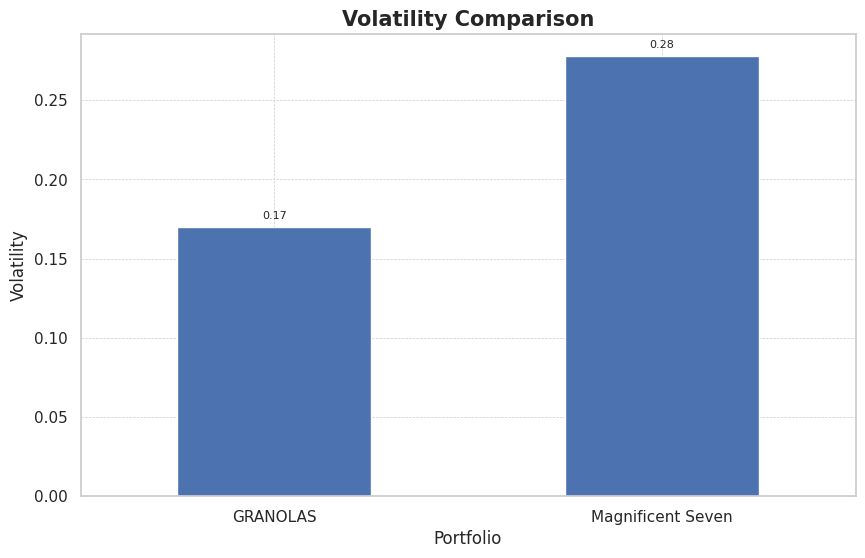

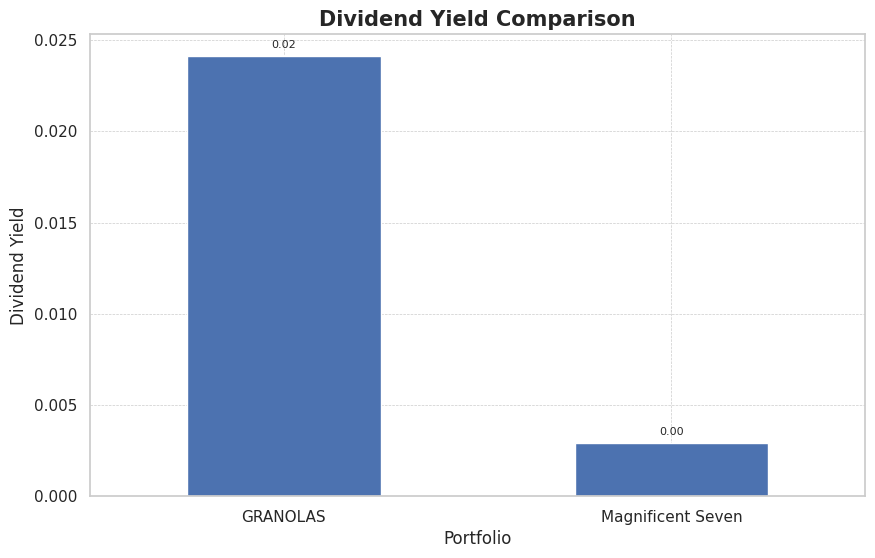

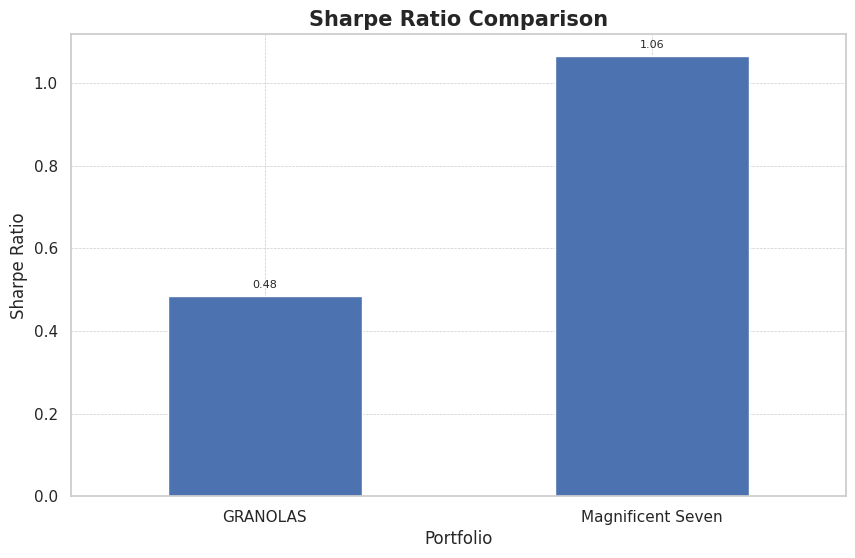

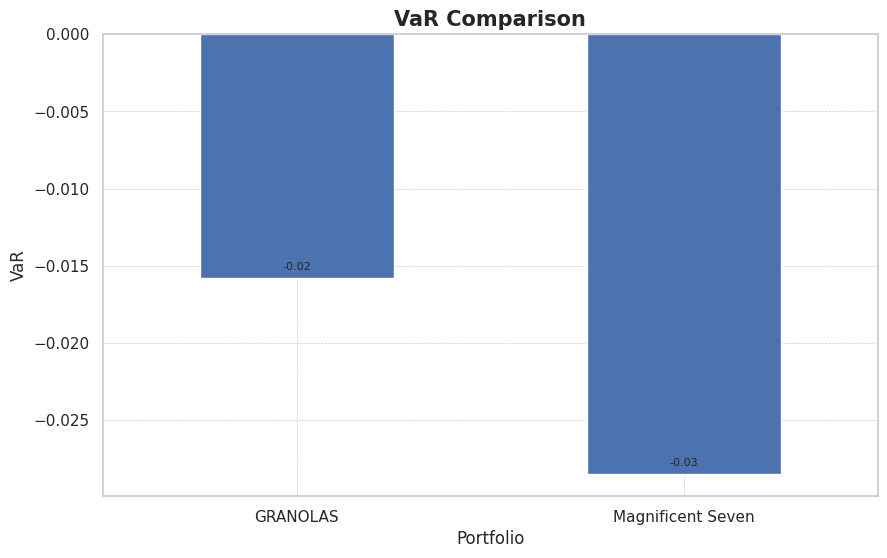

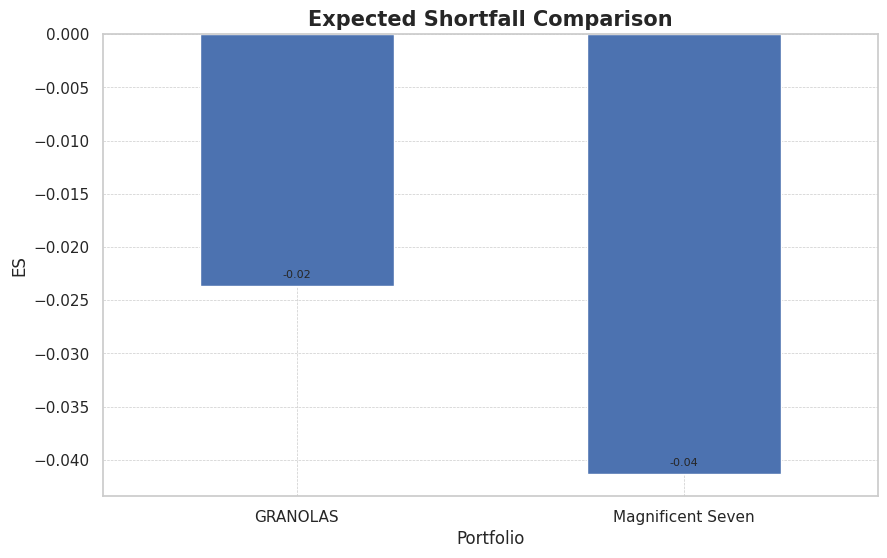

In [ ]:
# Visualization

sns.set(style="whitegrid")

def plot_metric(data, metric, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = data.plot(kind='bar', ax=ax)
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('Portfolios', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add value annotations on bars
    for bar in bars.patches:
        ax.annotate(f'{bar.get_height():.2f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    xytext=(0, 8),
                    textcoords='offset points',
                    fontsize=8)
    plt.show()

# Plotting each metric separately
plot_metric(portfolio_metrics.set_index('Portfolio')['Volatility'], 'Volatility', 'Volatility Comparison')
print("\n")
plot_metric(portfolio_metrics.set_index('Portfolio')['Dividend Yield'], 'Dividend Yield', 'Dividend Yield Comparison')
plot_metric(portfolio_metrics.set_index('Portfolio')['Sharpe Ratio'], 'Sharpe Ratio', 'Sharpe Ratio Comparison')
plot_metric(portfolio_metrics.set_index('Portfolio')['VaR'], 'VaR', 'VaR Comparison')
plot_metric(portfolio_metrics.set_index('Portfolio')['ES'], 'ES', 'Expected Shortfall Comparison')